In [45]:
library(ggplot2)
library(psych)
library(lmtest)
library(DAAG)
library(MASS)
library(PerformanceAnalytics)
library(olsrr)
library(sandwich)
library(vars)
library(nortest)
library(caret)
library(olsrr)

In [46]:
data = read.csv("Medical.csv", header=T)
head(data)
str(data)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [47]:
# Checking for the missing values : No missing values found

sapply(data, function(x) sum(is.na(x)))

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

0%        5%       10%       25%       50%       75%       90%       95% 
 1121.874  1757.753  2346.534  4740.287  9382.033 16639.913 34831.720 41181.828 
      99%     99.5%      100% 
48537.481 50086.985 63770.428

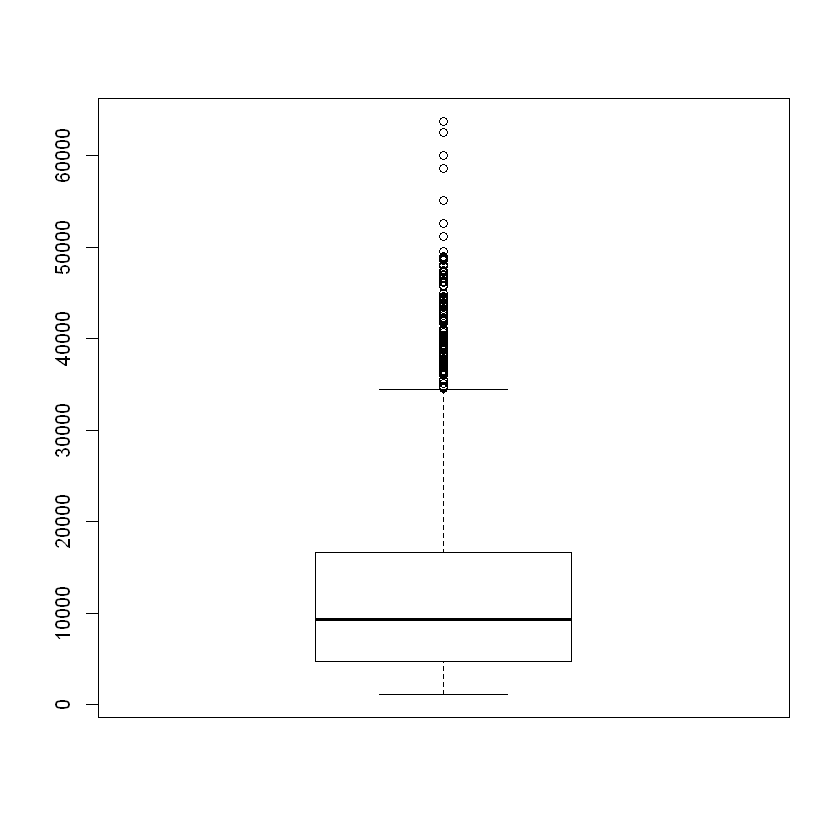

In [48]:
# Checking for the presence of Outliers in Dependent variable and removing them

boxplot(data$charges)
quantile(data$charges, c(0,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.99,0.995,1))

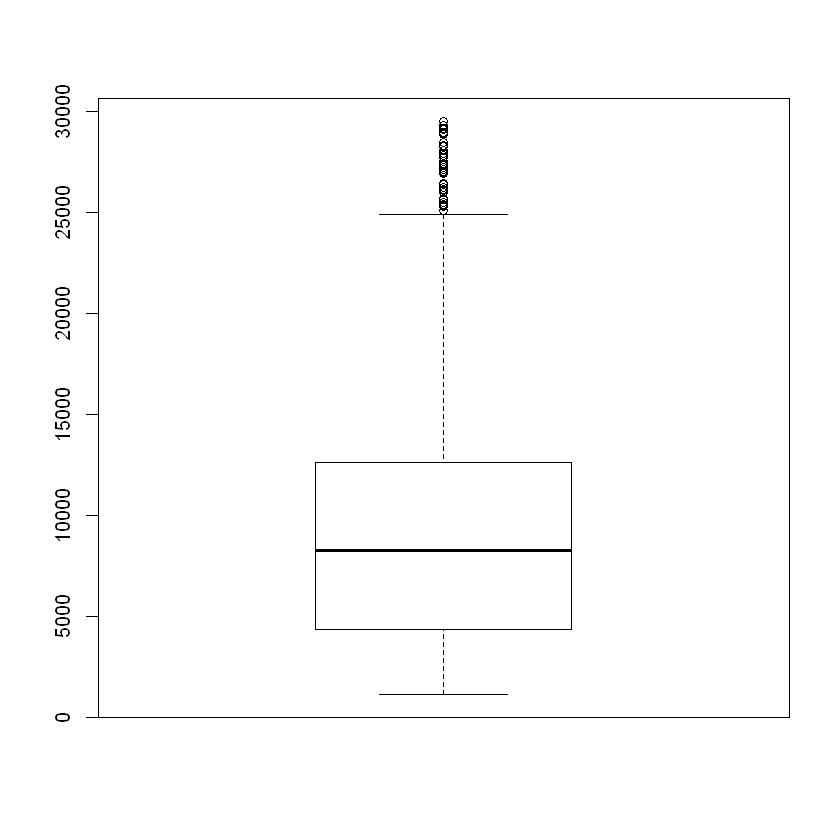

In [49]:

data <- data[data$charges <30000 , ]
boxplot(data$charges)


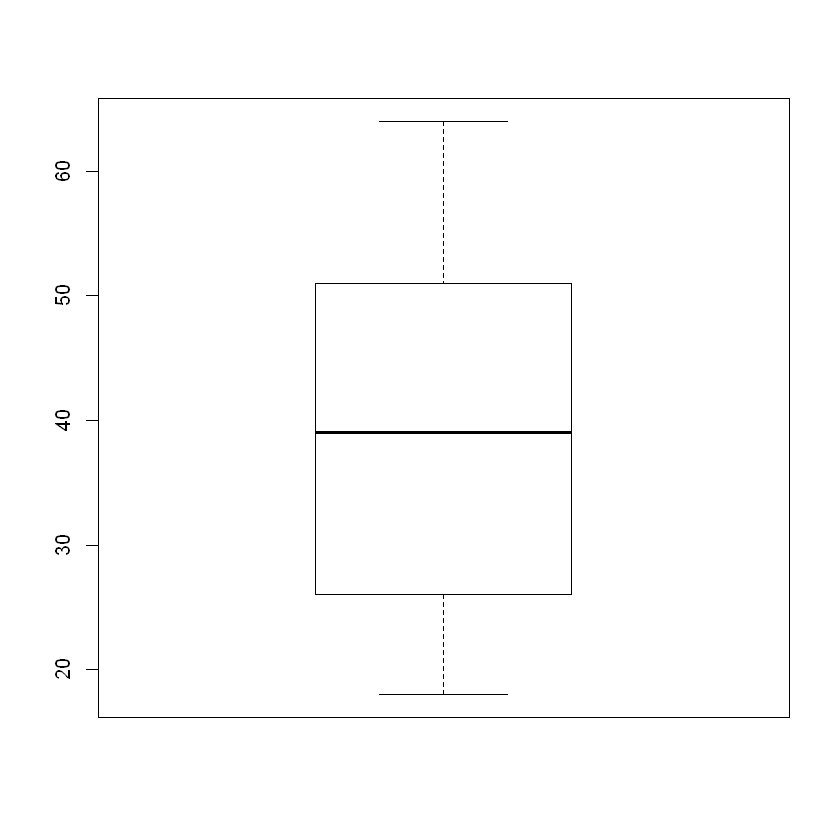

In [50]:
# Checking the presence of Outliers in other independent variables and removing them
boxplot(data$age)

In [51]:
nrow(data)
names(data)

[1] 1176

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

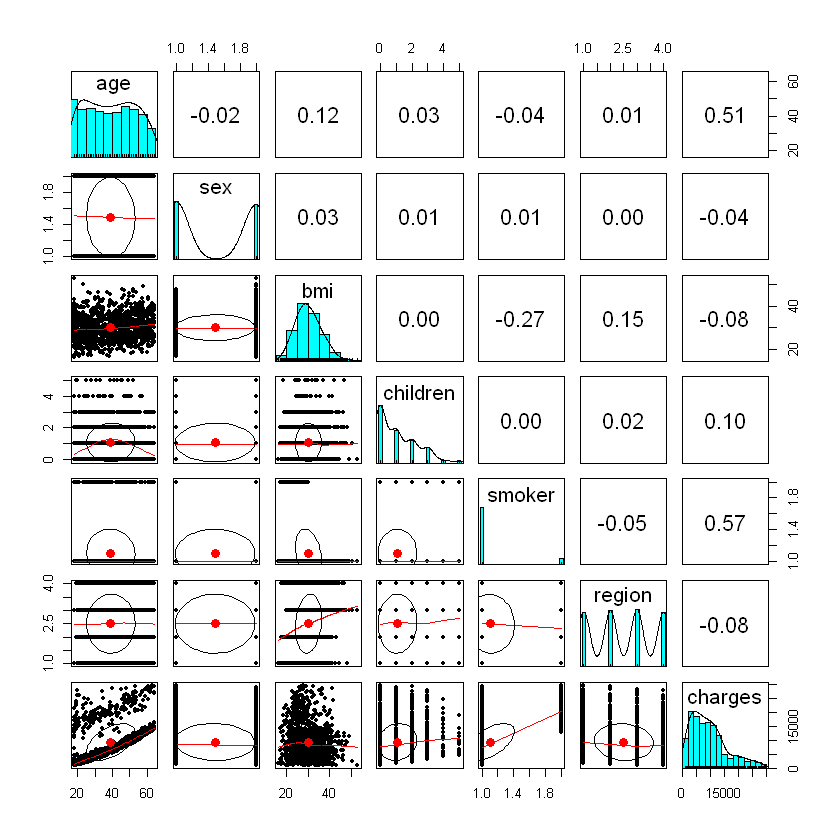

In [63]:
pairs.panels(data, method='pearson')

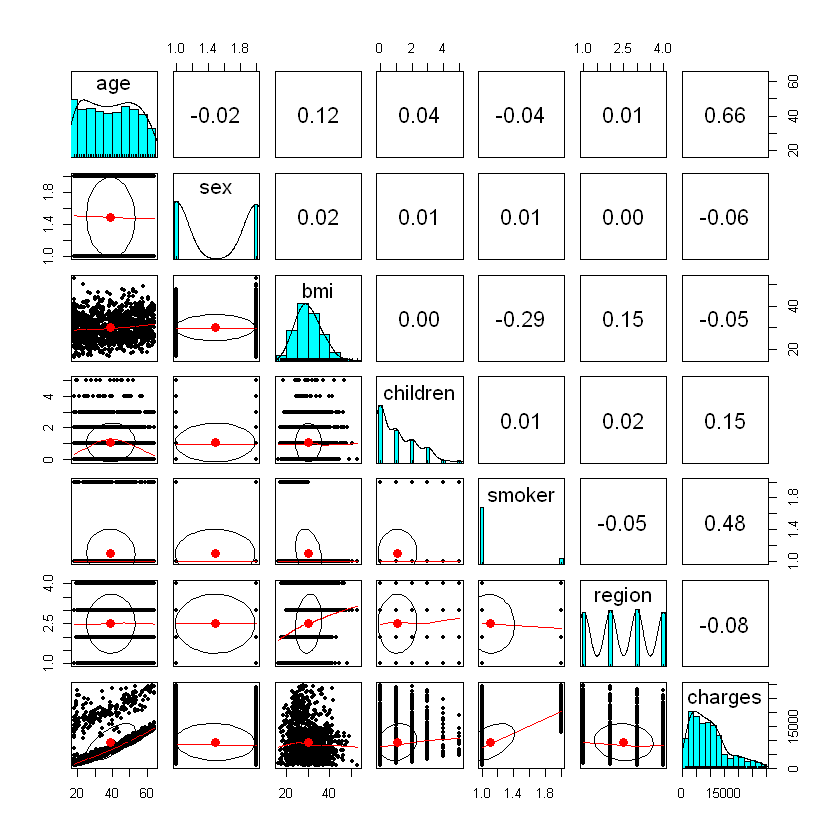

In [62]:
pairs.panels(data, method='spearman')

In [53]:
# Iteration 1

fit = lm(charges ~ . , data= data)
summary(fit)


Call:
lm(formula = charges ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4148.5 -1615.7 -1145.2  -445.7 24624.8 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2153.131    718.806  -2.995 0.002798 ** 
age               249.165      8.459  29.456  < 2e-16 ***
sexmale          -493.881    234.685  -2.104 0.035553 *  
bmi                29.557     21.108   1.400 0.161685    
children          458.869     96.632   4.749  2.3e-06 ***
smokeryes       12852.975    400.361  32.103  < 2e-16 ***
regionnorthwest  -401.945    332.429  -1.209 0.226863    
regionsoutheast  -739.345    340.603  -2.171 0.030156 *  
regionsouthwest -1145.786    336.194  -3.408 0.000676 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4019 on 1167 degrees of freedom
Multiple R-squared:  0.6279,	Adjusted R-squared:  0.6254 
F-statistic: 246.2 on 8 and 1167 DF,  p-value: < 2.2e-16


In [68]:
# Iteraion 2
fit = lm(charges ~ age +children + I(smoker=="yes") +I(smoker=="no"), data= data)
summary(fit)


Call:
lm(formula = charges ~ age + children + I(smoker == "yes") + 
    I(smoker == "no"), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4347.8 -1641.6 -1160.2  -387.3 24378.0 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2116.711    366.343  -5.778 9.68e-09 ***
age                      250.742      8.435  29.727  < 2e-16 ***
children                 448.125     97.080   4.616 4.34e-06 ***
I(smoker == "yes")TRUE 12756.990    386.685  32.991  < 2e-16 ***
I(smoker == "no")TRUE         NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4041 on 1172 degrees of freedom
Multiple R-squared:  0.6223,	Adjusted R-squared:  0.6213 
F-statistic: 643.6 on 3 and 1172 DF,  p-value: < 2.2e-16


In [69]:
confint(fit)

,2.5 %,97.5 %
(Intercept),-2835.4720,-1397.9506
age,234.1931,267.2915
children,257.6557,638.5947
"I(smoker == ""yes"")TRUE",11998.3167,13515.6628
"I(smoker == ""no"")TRUE",NA,NA


In [70]:
model <- stepAIC(fit, direction = "both", trace = F)
summary(model)


Call:
lm(formula = charges ~ age + children + I(smoker == "yes"), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4347.8 -1641.6 -1160.2  -387.3 24378.0 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2116.711    366.343  -5.778 9.68e-09 ***
age                      250.742      8.435  29.727  < 2e-16 ***
children                 448.125     97.080   4.616 4.34e-06 ***
I(smoker == "yes")TRUE 12756.990    386.685  32.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4041 on 1172 degrees of freedom
Multiple R-squared:  0.6223,	Adjusted R-squared:  0.6213 
F-statistic: 643.6 on 3 and 1172 DF,  p-value: < 2.2e-16


In [71]:
# Checking the Assumptions :
# checking Multicollinearity Assumption :
vif(model)

age           children I(smoker == "yes") 
          1.002116           1.000697           1.001454

In [72]:
# checking Normality Assumption for Residuals:
resids <- model$residuals
ad.test(resids)


	Anderson-Darling normality test

data:  resids
A = 225.26, p-value < 2.2e-16


In [73]:
library(car)
# checking Auto-Correlation Assumption :
dwt(model)

 lag Autocorrelation D-W Statistic p-value
   1    -0.009530169      2.018409   0.858
 Alternative hypothesis: rho != 0

In [74]:
# checking Homoscedasticity Assumption :
# Breusch-Pagan test
bptest(model)  



	studentized Breusch-Pagan test

data:  model
BP = 12.045, df = 3, p-value = 0.00723


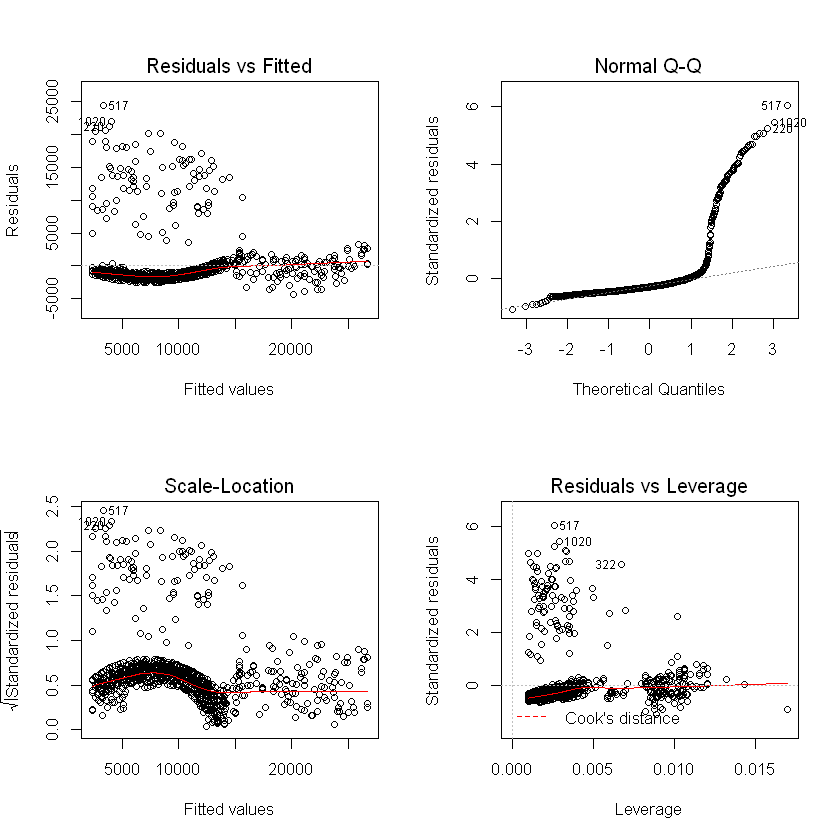

In [75]:
par(mfrow = c(2,2))
plot(model)

In [77]:
# Get the predicted or fitted values
data$pred <- fitted(model)

In [78]:

# Calculating MAPE
attach(data)
(sum((abs(charges-pred))/charges))/nrow(data)

[1] 0.2852035

### Suggested Approach
1. Understand the variables in the data set and study about the Industry.
2. Clean the data set.
3. Divide the data set into two parts: - Development Sample & Validation Sample.
4. Run Regression model.
5. Check which variables are significant by looking at p values and business reasons
6. Do different tests like multicollinearity test, Homoscedasticity test, Normality test, MAPE.

### 1. Significant Variables:
1. Age
2. Smoker
3. children
